# PCA

Low-dimension representations of embedding vectors 

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
def get_pc(embedding_name):
    data = pd.read_csv('../embedding/embedding/'+embedding_name+'.csv',index_col=0)
    clf = PCA(n_components=2,whiten=False)
    clf.fit(data.values)
    df = pd.DataFrame(clf.fit_transform(data.values),index=data.index,columns=['pc1','pc2'])
    graph = nx.read_edgelist('../graph/whole_undirected_graph.g')
    nodes = list(graph.nodes)
    node_count = {node:sum([value['weight'] for value in graph[node].values()])\
                  for node in nodes}
    node_count = {k:v for k,v in sorted(node_count.items(), key=lambda item:item[1],\
                                        reverse=True)}
    station = list(node_count.keys())[:12]
    pc1 = df.loc[station,'pc1']
    pc2 = df.loc[station,'pc2']
    
    return station, pc1, pc2

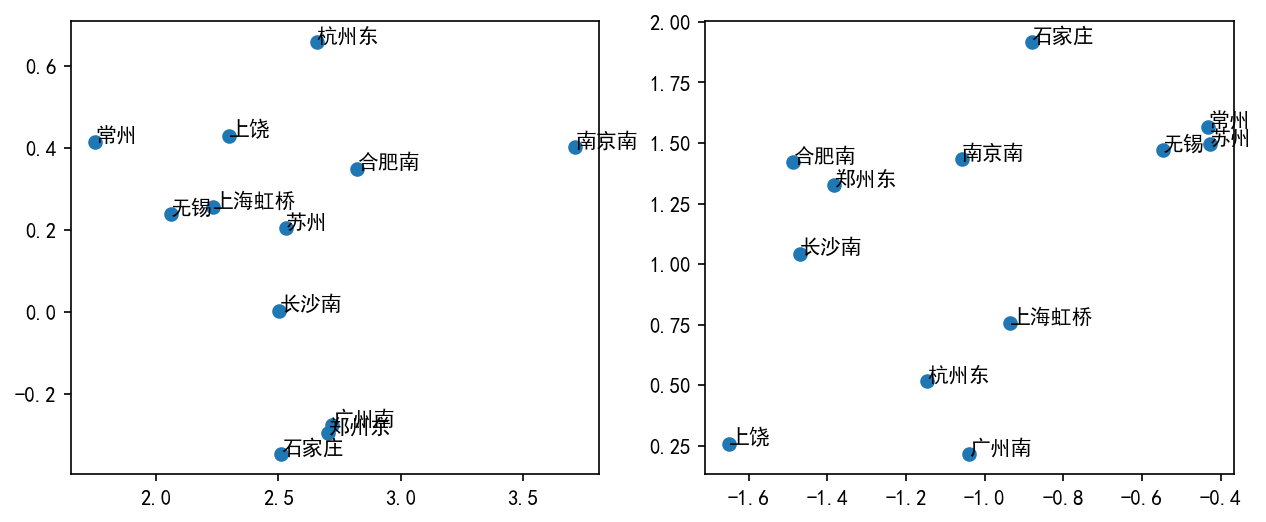

In [3]:
fig, (ax1, ax2) = plt.subplots(1,2,dpi=150,figsize=(10,4))

station, pc1, pc2 = get_pc('prob_walk_whole_graph_128')
ax1.scatter(pc1, pc2)
for i, txt in enumerate(station):
    ax1.annotate(txt, (pc1[i], pc2[i]))
    
station, pc1, pc2 = get_pc('random_walk_whole_graph_128')
ax2.scatter(pc1, pc2)
for i, txt in enumerate(station):
    ax2.annotate(txt, (pc1[i], pc2[i]))
    
plt.savefig('fig/pca.png')